In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 

import sys
sys.path.append('../src') 

from preprocess import *
from plots_analysis import *

import warnings
warnings.filterwarnings('ignore')

## Loading data

In [3]:
df = pd.read_csv('../data/robotarm.csv')

In [4]:
len(df)

5387

In [5]:
df.columns

Index(['Student ID', 'WorldSpace', 'index', 'Submission_TreeDist_Successive',
       'nb_tentative', 'pct_activity', 'error', 'missing', 'move1', 'move2',
       'pickup1', 'place1', 'nb_error', 'nb_missing', 'nb_move1', 'nb_move2',
       'nb_pickup1', 'nb_place1', 'pct_error', 'pct_missing', 'pct_move1',
       'pct_move2', 'pct_pickup1', 'pct_place1', 'euclidean_distance',
       'delta_successive', 'success', 'success_seq', 'has_error', 'activity',
       'error_seq', 'error_seq_gen', 'case1', 'case2', 'case3', 'cases',
       'case_seq', 'activity_all', 'bucket_delta_successive',
       'bucket_Submission_TreeDist_Successive',
       'median_split_delta_successive',
       'median_split_Submission_TreeDist_Successive', 'at_least_2_tentatives'],
      dtype='object')

In [6]:
df_l1 = df[df['activity'] == 1]
df_l2 = df[df['activity'] == 2]
df_l3 = df[df['activity'] == 3]

df_l1_fail = df_l1[df_l1['success'] == 0]
df_l1_success = df_l1[df_l1['success'] == 1]

df_l2_fail = df_l2[df_l2['success'] == 0]
df_l2_success = df_l2[df_l2['success'] == 1]

df_l3_fail = df_l3[df_l3['success'] == 0]
df_l3_success = df_l3[df_l3['success'] == 1]

print("L1 fail:", len(df_l1_fail['Student ID'].unique()))
print("L1 success:", len(df_l1_success['Student ID'].unique()))

print("L2 fail:", len(df_l2_fail['Student ID'].unique()))
print("L2 success:", len(df_l2_success['Student ID'].unique()))

print("L3 fail:", len(df_l3_fail['Student ID'].unique()))
print("L3 success:", len(df_l3_success['Student ID'].unique()))

L1 fail: 98
L1 success: 273
L2 fail: 97
L2 success: 212
L3 fail: 118
L3 success: 110


In [7]:
df_l1 = df[df['activity'] == 1]
df_l2 = df[df['activity'] == 2]
df_l3 = df[df['activity'] == 3]

In [9]:
df_l1['Student ID'].nunique(), df_l2['Student ID'].nunique(), df_l3['Student ID'].nunique()

(371, 309, 228)

In [10]:
df_l1_l2 = pd.concat([df_l1, df_l2])
df_l1_l2['activity'].value_counts()

activity
2    2098
1    2078
Name: count, dtype: int64

In [11]:
folder = '../plot/plot_report_analysis'

In [12]:
robotarm_per_student = grouped_per_student(df)

In [13]:
df_l1 = pd.read_csv('../data/robotarm_l1.csv')
df_l2 = pd.read_csv('../data/robotarm_l2.csv')
df_l3 = pd.read_csv('../data/robotarm_l3.csv')

In [14]:
df_l3 = df[df['activity'] == 3]
df_l1 = df[df['activity'] == 1]
df_l2 = df[df['activity'] == 2]

In [15]:
robotarm_per_student_l1 = grouped_per_student(df_l1)
robotarm_per_student_l2 = grouped_per_student(df_l2)
robotarm_per_student_l3 = grouped_per_student(df_l3)

FileNotFoundError: [Errno 2] No such file or directory: '../plot/plot_report_analysistentatives_per_student.png'

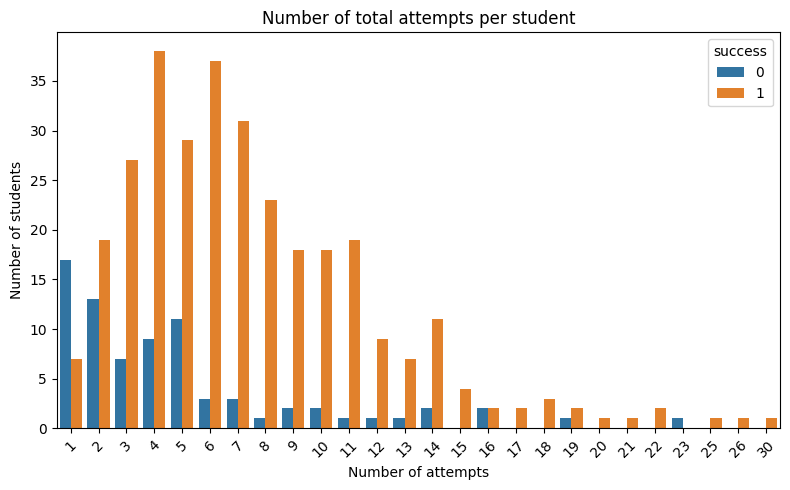

In [16]:
# plot of tentatives per student
plt.figure(figsize=(8, 5))
sns.countplot(x='nb_tentative', data=robotarm_per_student, hue='success')
plt.title('Number of total attempts per student')
plt.xticks(rotation=45)
plt.ylabel('Number of students')
plt.xlabel('Number of attempts')
plt.tight_layout()
plt.savefig(folder + 'tentatives_per_student.png')


In [136]:
df = df_l3
folder = '../plot/plot_report/'

In [124]:
tot_tentatives = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
df_true = df[df["success"] == 1]
df_false = df[df["success"] == 0]

nb_total = len(df['Student ID'].unique())
nb_student_true = len(df_true['Student ID'].unique())
nb_student_false = len(df_false['Student ID'].unique())

df_filtered = df[df['nb_tentative'] <= 10]
df_true_filtered = df_true[df_true['nb_tentative'] <= 10]
df_false_filtered = df_false[df_false['nb_tentative'] <= 10]

nb_total_filtered = len(df_filtered['Student ID'].unique())
nb_true_filtered = len(df_true_filtered['Student ID'].unique())
nb_false_filtered = len(df_false_filtered['Student ID'].unique())

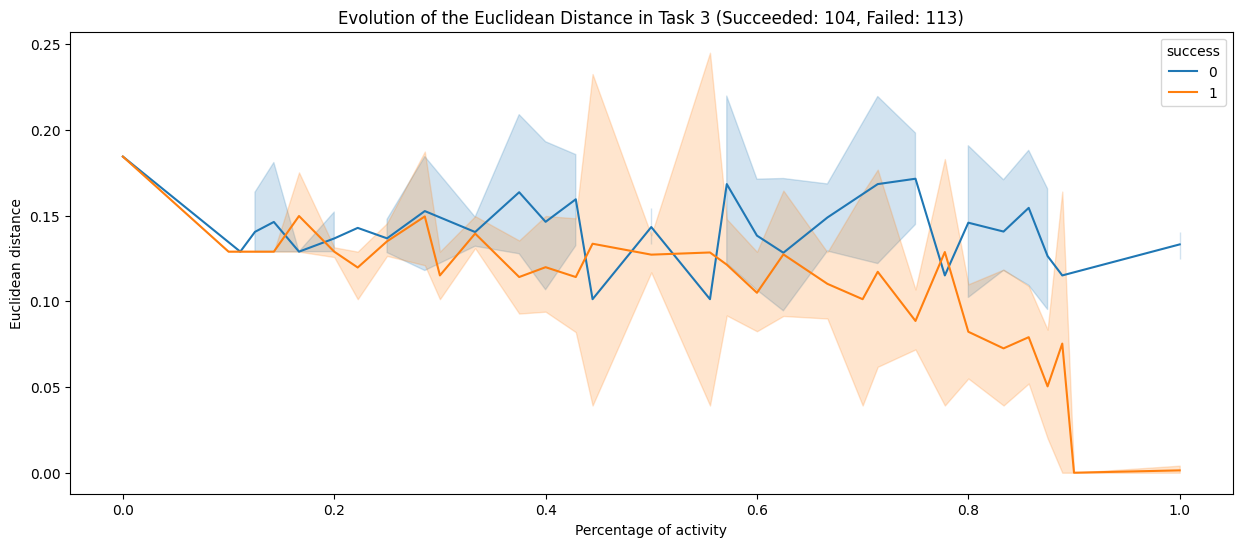

In [129]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x='pct_activity', y='euclidean_distance', hue="success",  data=df_filtered, 
                err_style="band", errorbar ='ci', estimator=np.mean, ci=95, ax=ax, legend=True)
ax.set_ylabel('Euclidean distance')
ax.set_xlabel("Percentage of activity")
ax.set_title(f'Evolution of the Euclidean Distance in Task 3 (Succeeded: {nb_true_filtered}, Failed: {nb_false_filtered})')
plt.savefig(f"{folder}/euclidean_distance_pct_activity.png")
#plt.show()

In [76]:
df.columns

Index(['Student ID', 'WorldSpace', 'index', 'Submission_TreeDist_Successive',
       'nb_tentative', 'pct_activity', 'error', 'missing', 'move1', 'move2',
       'pickup1', 'place1', 'nb_error', 'nb_missing', 'nb_move1', 'nb_move2',
       'nb_pickup1', 'nb_place1', 'pct_error', 'pct_missing', 'pct_move1',
       'pct_move2', 'pct_pickup1', 'pct_place1', 'euclidean_distance',
       'delta_successive', 'success', 'success_seq', 'has_error', 'activity',
       'error_seq', 'error_seq_gen', 'case1', 'case2', 'case3', 'cases',
       'case_seq', 'activity_all', 'bucket_delta_successive',
       'bucket_Submission_TreeDist_Successive',
       'median_split_delta_successive',
       'median_split_Submission_TreeDist_Successive', 'at_least_2_tentatives'],
      dtype='object')

In [137]:
tot_tentatives = [2, 3, 4, 5, 6, 7]

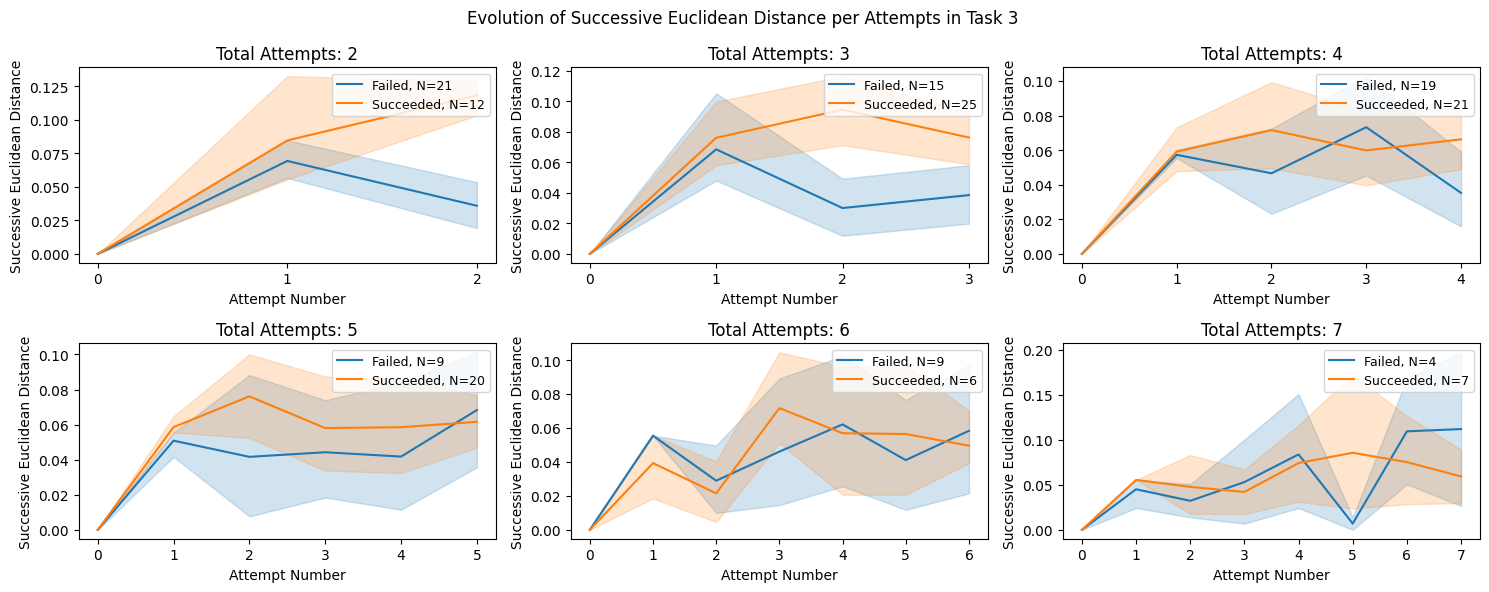

In [140]:
# Multi plot of delta_successive per tentative 
fig, axs = plt.subplots(2, 3, figsize=(15, 6))

for i, ax in enumerate(axs.flat):
    if i < len(tot_tentatives):
        grouped_data = df[df['nb_tentative'] == tot_tentatives[i]]
        
        # count number of failing and successful students
        nb_false_student = len(df_false[df_false['nb_tentative'] == tot_tentatives[i]]['Student ID'].unique())
        nb_true_student = len(df_true[df_true['nb_tentative'] == tot_tentatives[i]]['Student ID'].unique())

        sns.lineplot(data=grouped_data, y=f'delta_successive', x='index', hue="success",
                    err_style="band", errorbar ='ci', estimator=np.mean, ci=95, ax=ax, legend=True)
        
        ax.set_title(f"Total Attempts: {tot_tentatives[i]}")
        ax.set_xlabel("Attempt Number")
        ax.set_ylabel("Successive Euclidean Distance")
        ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        
        handles, labels = ax.get_legend_handles_labels()
        new_labels = []
        for label in labels:
            if label == '0':
                new_labels.append(f"Failed, N={nb_false_student}")
            else:
                new_labels.append(f"Succeeded, N={nb_true_student}")
        ax.legend(handles, new_labels, loc='upper right', fontsize=9)
        
    else:
        ax.axis('off')

plt.suptitle("Evolution of Successive Euclidean Distance per Attempts in Task 3 ")
plt.tight_layout()
plt.savefig(f"{folder}/delta_successive_per_tentative_multi.png")
#plt.show()

## Distribution of euclidean distance with and without penalty

In [93]:
df['penalty'] = 1
df_no_penalty['penalty'] = 0

df_tot = pd.concat([df, df_no_penalty])

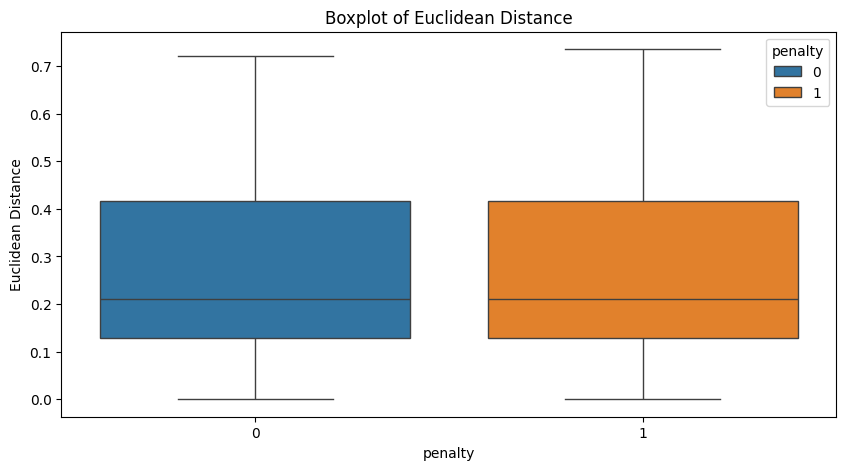

In [103]:
fig, ax = plt.subplots(figsize=(10, 5))
    
sns.boxplot(x="penalty", y='euclidean_distance', hue="penalty", data=df_tot, ax=ax)
ax.set_ylabel('Euclidean Distance')
ax.set_title('Boxplot of Euclidean Distance')
plt.savefig(f"{folder}/euclidean_distance_boxplot_penalty.png")
#plt.show()

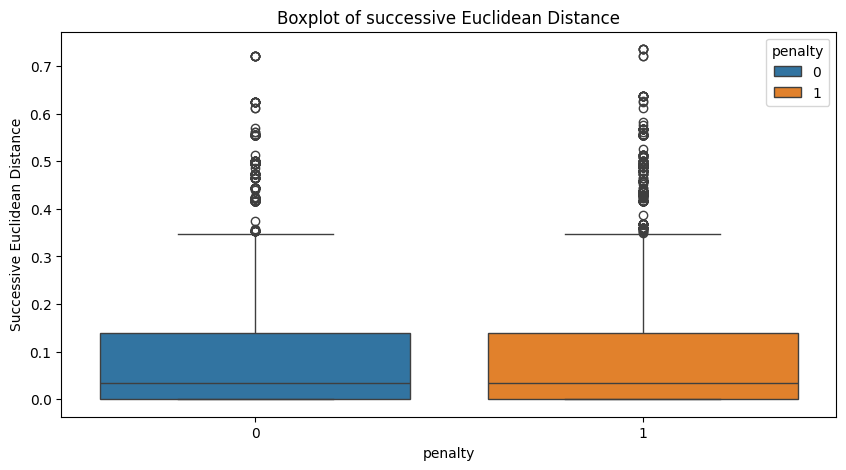

In [104]:
fig, ax = plt.subplots(figsize=(10, 5))
    
sns.boxplot(x="penalty", y='delta_successive', hue="penalty", data=df_tot, ax=ax)
ax.set_ylabel('Successive Euclidean Distance')
ax.set_title('Boxplot of successive Euclidean Distance')
plt.savefig(f"{folder}/delta_successive_boxplot_penalty.png")
#plt.show()

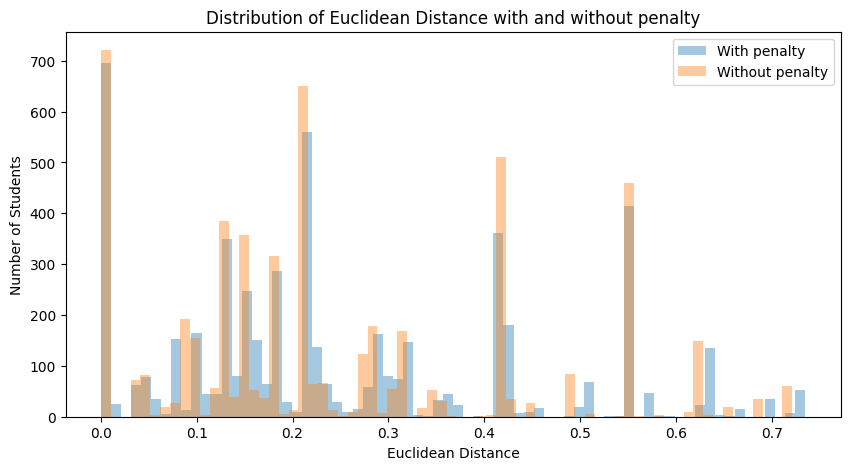

In [122]:
fig, ax = plt.subplots(figsize=(10, 5))
    
ax.hist(df['euclidean_distance'], bins=70, alpha=0.4, label='With penalty')
ax.hist(df_no_penalty['euclidean_distance'], bins=70, alpha=0.4, label='Without penalty')
ax.set_xlabel('Euclidean Distance')
ax.set_ylabel('Number of Students')
ax.set_title('Distribution of Euclidean Distance with and without penalty')
plt.legend()
plt.savefig(f"{folder}/euclidean_distance_hist_penalty.png")
#plt.show()

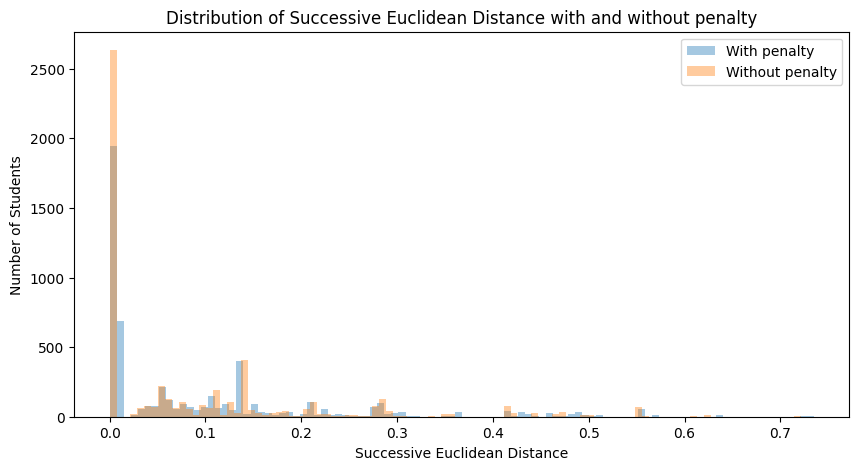

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))
    
ax.hist(df['delta_successive'], bins=100, alpha=0.4, label='With penalty')
ax.hist(df_no_penalty['delta_successive'], bins=100, alpha=0.4, label='Without penalty')
ax.set_xlabel('Successive Euclidean Distance')
ax.set_ylabel('Number of Students')
ax.set_title('Distribution of Successive Euclidean Distance with and without penalty')
plt.legend()
plt.savefig(f"{folder}/delta_successive_hist_penalty.png")
#plt.show()

### Overall error rate

In [144]:
folder = '../plot/plot_report/'

In [146]:
df_filtered = df[df['nb_tentative'] <= 10]

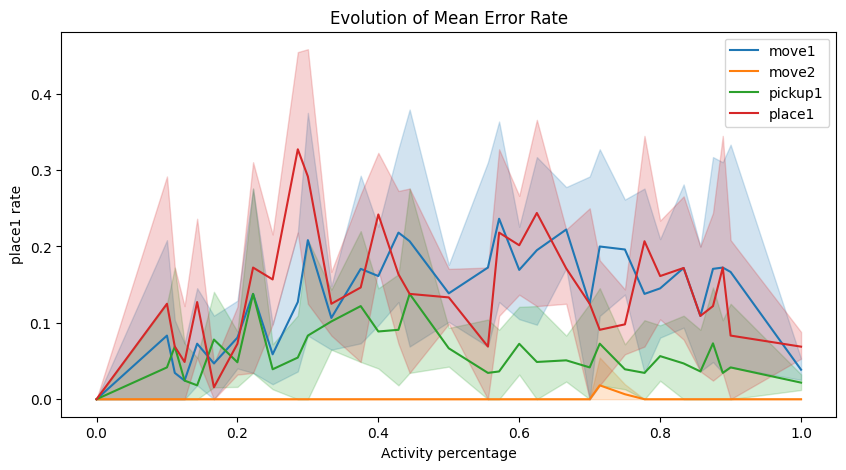

In [147]:
fig, ax = plt.subplots(figsize=(10, 5))
for error in ['move1', 'move2', 'pickup1', 'place1']:
    sns.lineplot(x="pct_activity", y=error, data=df_filtered, ax=ax, 
                err_style="band", errorbar ='ci', estimator=np.mean, ci=95, label=error, legend=True)
ax.set_ylabel(f'{error} rate')
ax.set_xlabel("Activity percentage")
ax.set_title(f'Evolution of Mean Error Rate')
ax.legend(loc='upper right')
plt.savefig(f"{folder}/errors_type_pct_activity.png")
#plt.show()

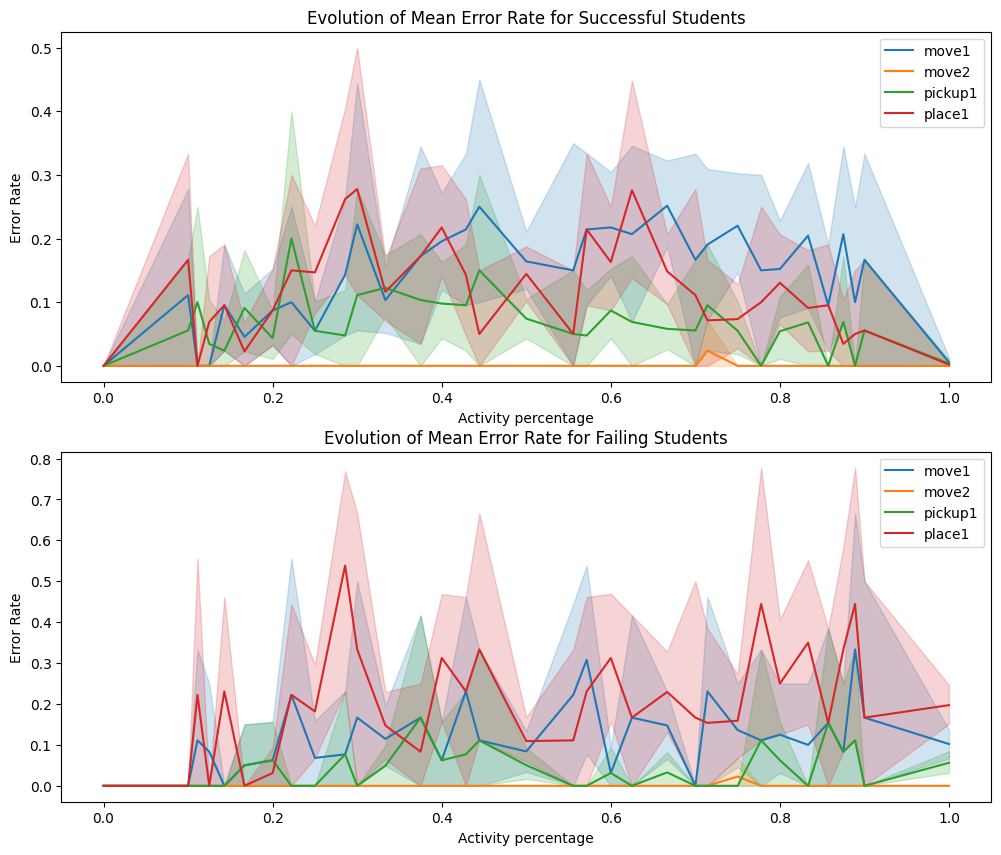

In [158]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 10))
df_filtered_success = df_filtered[df_filtered['success'] == 1]
df_filtered_fail = df_filtered[df_filtered['success'] == 0]


for error in ['move1', 'move2', 'pickup1', 'place1']:
    sns.lineplot(x="pct_activity", y=error, data=df_filtered_success, ax=ax[0], 
                err_style="band", errorbar ='ci', estimator=np.mean, ci=95, label=error, legend=True)
ax[0].set_ylabel(f'Error Rate')
ax[0].set_xlabel("Activity percentage")
ax[0].set_title(f'Evolution of Mean Error Rate for Successful Students')
ax[0].legend(loc='upper right')

for error in ['move1', 'move2', 'pickup1', 'place1']:
    sns.lineplot(x="pct_activity", y=error, data=df_filtered_fail, ax=ax[1], 
                err_style="band", errorbar ='ci', estimator=np.mean, ci=95, label=error, legend=True)
ax[1].set_ylabel(f'Error Rate')
ax[1].set_xlabel("Activity percentage")
ax[1].set_title(f'Evolution of Mean Error Rate for Failing Students')
ax[1].legend(loc='upper right')

plt.savefig(f"{folder}/errors_type_pct_activity.png")
#plt.show()

In [12]:
df_l2['activity'].value_counts()

activity
2    2098
Name: count, dtype: int64

In [19]:
folder = '../plot/plot_report'

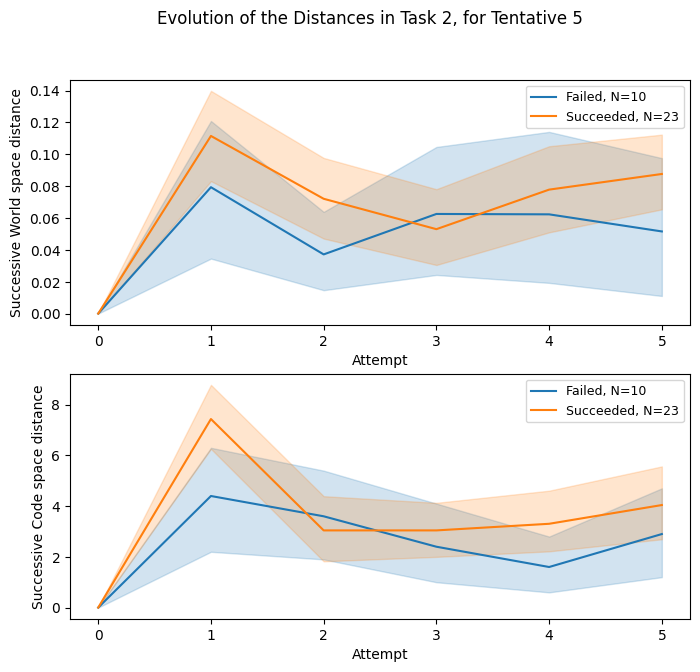

In [19]:
data_filtered = df_l2[df_l2['nb_tentative'] <= 10]
            
data_filtered_tentative = data_filtered[data_filtered['nb_tentative'] == 5]
#data_tentative = data_filtered_tentative[data_filtered_tentative['success'] == s]

#count_error_per_tentative = data_tentative.groupby('index').agg({'error': 'sum'}).reset_index()
#count_error_per_tentative['success'] = success_filter
nb_student_success = len(data_filtered_tentative[data_filtered_tentative['success'] == 1]['Student ID'].unique())
nb_student_fail = len(data_filtered_tentative[data_filtered_tentative['success'] == 0]['Student ID'].unique())

if nb_student != 0:

    fig, axs = plt.subplots(2, 1, figsize=(8, 7))
    
    #sns.barplot(x='index', y='error', hue='success', data=count_error_per_tentative, ax=axs[0])
    sns.lineplot(data=data_filtered_tentative, x='index', y='delta_successive', hue='success', estimator='mean', ci=95, ax=axs[0])
    sns.lineplot(data=data_filtered_tentative, x='index', y='Submission_TreeDist_Successive', hue='success', estimator='mean', ci=95, ax=axs[1])

    #axs[0].set_title(f"Successive World space distance")
    axs[0].set_xlabel("Attempt")
    axs[0].set_ylabel(f"Successive World space distance")

    #axs[1].set_title(f"Successive Code space distance")
    axs[1].set_xlabel("Attempt")
    axs[1].set_ylabel("Successive Code space distance")
    plt.suptitle(f"Evolution of the Distances in Task 2, for Tentative 5")
    # modify legend
    for ax in axs:
        handles, labels = ax.get_legend_handles_labels()
        new_labels = []
        for label in labels:
            if label == '0':
                new_labels.append(f"Failed, N={nb_student_fail}")
            else:
                new_labels.append(f"Succeeded, N={nb_student_success}")
                
        ax.legend(handles, new_labels, loc='upper right', fontsize=9)
    #plt.savefig(f"{folder}/world_code_distance_tentative_5_task_2.png")
    #plt.show()

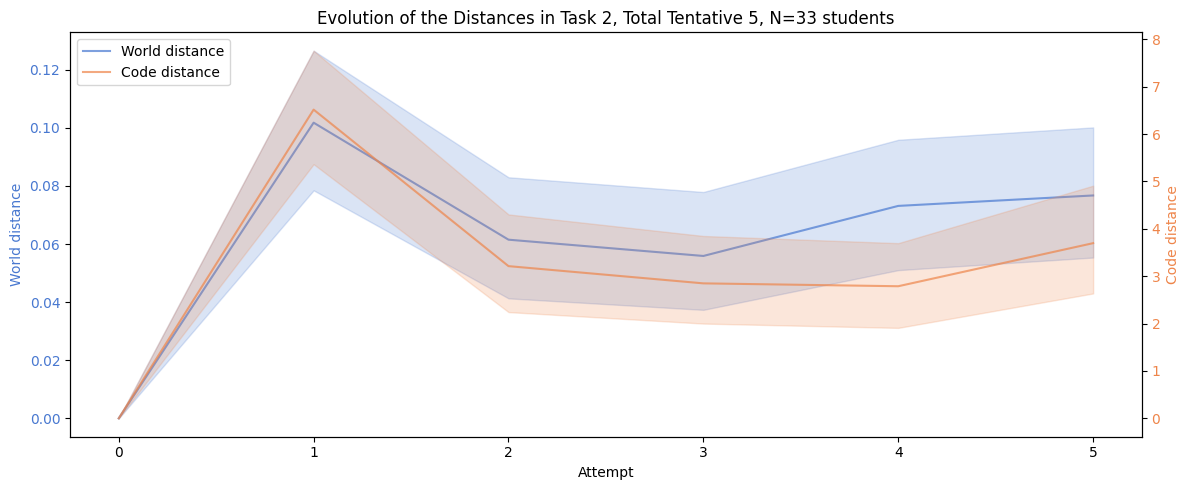

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the data as per your requirements
data_filtered = df_l2[df_l2['nb_tentative'] <= 10]
data_filtered_tentative = data_filtered[data_filtered['nb_tentative'] == 5]

nb_student = len(data_filtered_tentative['Student ID'].unique())

if nb_student != 0:
    fig, ax1 = plt.subplots(figsize=(12, 5))

    color1 = '#4878d0'
    color2 = '#ee854a'

    ax1.set_xlabel('Attempt')
    ax1.set_ylabel('World distance', color=color1)
    line1 = sns.lineplot(data=data_filtered_tentative, x='index', y='delta_successive', estimator='mean', ci=95, ax=ax1, color=color1, alpha=0.7)
    ax1.tick_params(axis='y', labelcolor=color1)

    ax2 = ax1.twinx()
    ax2.set_ylabel('Code distance', color=color2)
    line2 = sns.lineplot(data=data_filtered_tentative, x='index', y='Submission_TreeDist_Successive', estimator='mean', ci=95, ax=ax2, color=color2, alpha=0.7)
    ax2.tick_params(axis='y', labelcolor=color2)

    plt.title(f"Evolution of the Distances in Task 2, Total Tentative 5, N={nb_student} students")
    
    # Manually adding the legend
    lines = [line1.lines[0], line2.lines[0]]
    labels = ['World distance', 'Code distance']
    ax1.legend(lines, labels, loc='upper left')

    plt.tight_layout()
    #plt.savefig(f"{folder}/world_code_distance_tentative_5_task_2.png")
    plt.show()

In [9]:
print(sns.color_palette("muted").as_hex())

['#4878d0', '#ee854a', '#6acc64', '#d65f5f', '#956cb4', '#8c613c', '#dc7ec0', '#797979', '#d5bb67', '#82c6e2']


### Pearson's correlation 

In [50]:
import scipy.stats as stats

# pearson correlation between Successive Euclidean Distance and Successive Code Space Distance
df_l1 = df[df['activity'] == 1]
df_l2 = df[df['activity'] == 2]
df_l3 = df[df['activity'] == 3]

dfs = [df_l1, df_l2, df_l3]

for i, data in enumerate(dfs): 
    print(f"Activity {i+1}")
    print(stats.pearsonr(data['delta_successive'], data['Submission_TreeDist_Successive']))

Activity 1
PearsonRResult(statistic=0.47758573047115066, pvalue=7.224552713680844e-119)
Activity 2
PearsonRResult(statistic=0.47524276319187053, pvalue=1.119315458408969e-118)
Activity 3
PearsonRResult(statistic=0.5394558235967246, pvalue=2.181728658128001e-92)


### Test correlation with median and distribution split

In [82]:
df.columns

Index(['Student ID', 'WorldSpace', 'index', 'Submission_TreeDist_Successive',
       'nb_tentative', 'pct_activity', 'error', 'missing', 'move1', 'move2',
       'pickup1', 'place1', 'nb_error', 'nb_missing', 'nb_move1', 'nb_move2',
       'nb_pickup1', 'nb_place1', 'pct_error', 'pct_missing', 'pct_move1',
       'pct_move2', 'pct_pickup1', 'pct_place1', 'euclidean_distance',
       'delta_successive', 'success', 'success_seq', 'has_error', 'activity',
       'error_seq', 'error_seq_gen', 'case1', 'case2', 'case3', 'cases',
       'case_seq', 'activity_all', 'bucket_delta_successive',
       'bucket_Submission_TreeDist_Successive',
       'median_split_delta_successive',
       'median_split_Submission_TreeDist_Successive', 'at_least_2_tentatives'],
      dtype='object')

In [83]:
df['median_split_Submission_TreeDist_Successive'].value_counts()

median_split_Submission_TreeDist_Successive
low     3175
high    2212
Name: count, dtype: int64

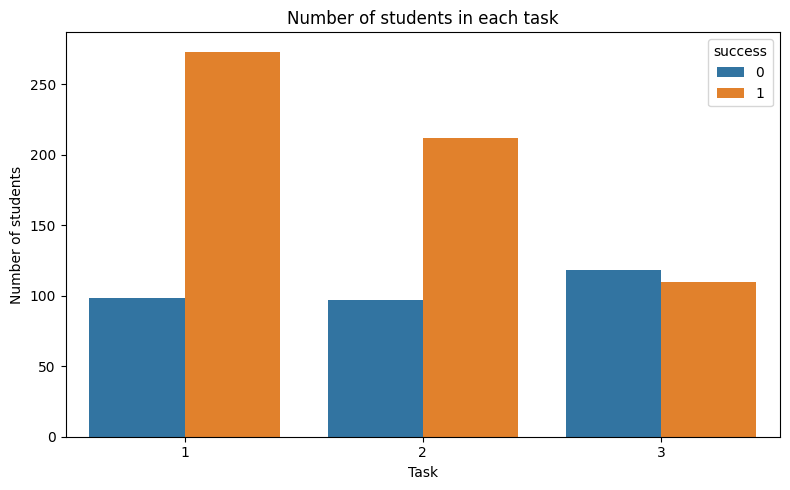

In [38]:
# plot number of students in each task 

fig, ax = plt.subplots(figsize=(8, 5))

df_l1_student = grouped_per_student(df_l1)
df_l2_student = grouped_per_student(df_l2)
df_l3_student = grouped_per_student(df_l3)

df_l1_student['activity'] = 1   
df_l2_student['activity'] = 2
df_l3_student['activity'] = 3

df_student = pd.concat([df_l1_student, df_l2_student, df_l3_student])

sns.countplot(x='activity', data=df_student, hue='success')

plt.title('Number of students in each task')
#plt.xticks(rotation=45)
plt.ylabel('Number of students')
plt.xlabel('Task')
plt.tight_layout()

plt.show()

In [41]:
from metric_tests import *

In [58]:
def test_comparing_metrics_2_1(list_vec, goal_vec, title, print_results=False):
    fig, ax = plt.subplots(2, 2, figsize=(12, 6))

    length = len(list_vec)
    indices = [i + 1 for i in range(length)]

    levenshtein_results_row = test_levenshtein("row", list_vec, goal_vec)
    levenshtein_results_column = test_levenshtein("col", list_vec, goal_vec)
    levenshtein_results_bars = test_levenshtein("bars", list_vec, goal_vec)
    levenshtein_results_row_concat = test_levenshtein("row_concat", list_vec, goal_vec)
    levenshtein_results_col_concat = test_levenshtein("col_concat", list_vec, goal_vec)

    ax[0, 0].plot(indices, levenshtein_results_row, label="per row", alpha=0.5, marker='o')
    #ax[0, 0].plot(indices, levenshtein_results_column, label="per column", alpha=0.5, marker='o')
    #ax[0, 0].plot(indices, levenshtein_results_bars, label="per bar", alpha=0.5, marker='o')
    #ax[0, 0].plot(indices, levenshtein_results_col_concat, label="col concat", alpha=0.5, marker='o')
    #ax[0, 0].plot(indices, levenshtein_results_row_concat, label="row concat", alpha=0.5, marker='o')
    #ax[0, 0].set_title("Levenshtein distance")
    ax[0, 0].set_ylabel("Levenshtein distance")
    ax[0, 0].legend()

    euclidean_results = test_euclidean(list_vec, goal_vec, print_results=print_results)

    ax[0, 1].plot(indices, euclidean_results, label="Euclidean", alpha=0.5, marker='o')
    ax[0, 1].set_title("Euclidean distance")
    ax[0, 1].set_ylabel("Euclidean distance")
    ax[0, 1].legend()

    ratcliff_results_row = test_ratcliff("row", list_vec, goal_vec)
    ratcliff_results_column = test_ratcliff("col", list_vec, goal_vec)
    ratcliff_results_bars = test_ratcliff("bars", list_vec, goal_vec)
    ratcliff_results_row_concat = test_ratcliff("row_concat", list_vec, goal_vec)
    ratcliff_results_col_concat = test_ratcliff("col_concat", list_vec, goal_vec)

    ax[1, 0].plot(indices, ratcliff_results_row, label="per row", alpha=0.5, marker='o')
    #ax[1, 0].plot(indices, ratcliff_results_column, label="per column", alpha=0.5, marker='o')
    #ax[1, 0].plot(indices, ratcliff_results_bars, label="per bar", alpha=0.5, marker='o')
    #ax[1, 0].plot(indices, ratcliff_results_col_concat, label="col concat", alpha=0.5, marker='o')
    #ax[1, 0].plot(indices, ratcliff_results_row_concat, label="row concat", alpha=0.5, marker='o')
    ax[1, 0].set_title("Ratcliff distance")
    ax[1, 0].set_ylabel("Ratcliff distance")
    ax[1, 0].legend()
    
    jaro_results_row = test_jaro("row", list_vec, goal_vec)
    jaro_results_column = test_jaro("col", list_vec, goal_vec)
    jaro_results_bars = test_jaro("bars", list_vec, goal_vec)
    jaro_results_row_concat = test_jaro("row_concat", list_vec, goal_vec)
    jaro_results_col_concat = test_jaro("col_concat", list_vec, goal_vec)

    #ax[1, 1].plot(indices, jaro_results_row, label="per row", alpha=0.5, marker='o')
    #ax[1, 1].plot(indices, jaro_results_column, label="per column", alpha=0.5, marker='o')
    #ax[1, 1].plot(indices, jaro_results_bars, label="per bar", alpha=0.5, marker='o')
    ax[1, 1].plot(indices, jaro_results_col_concat, label="col concat", alpha=0.5, marker='o')
    #ax[1, 1].plot(indices, jaro_results_row_concat, label="row concat", alpha=0.5, marker='o')
    ax[1, 1].set_title("Jaro distance")
    ax[1, 1].set_ylabel("Jaro distance")
    ax[1, 1].legend()

    # title for the whole plot
    fig.suptitle(title)
    plt.legend()
    
    #plt.savefig(folder_name + "comparison_metric_list_" + str(nb) + ".png")
    plt.show()

In [70]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def test_comparing_metrics_2(list_vec, goal_vec, print_results=False):
    fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))

    length = len(list_vec)
    indices = [i + 1 for i in range(length)]

    levenshtein_results_row = test_levenshtein("row", list_vec, goal_vec)
    euclidean_results = test_euclidean(list_vec, goal_vec, print_results=print_results)
    ratcliff_results_row = test_ratcliff("row", list_vec, goal_vec)
    jaro_results_col_concat = test_jaro("col_concat", list_vec, goal_vec)
    
    # Plotting the distances on the primary y-axis
    ax1.plot(indices, levenshtein_results_row, label="Levenshtein", color='tab:blue', linestyle='dashed')
    ax1.plot(indices, euclidean_results, label="Euclidean", marker='o', color='tab:green')
    ax1.plot(indices, ratcliff_results_row, label="Ratcliff", color='tab:orange', linestyle='dotted')
    
    ax1.set_xlabel("Index")
    ax1.set_ylabel("Distance (Levenshtein, Euclidean, Ratcliff)")
    ax1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax1.legend(loc='upper left')

    # Creating a secondary y-axis for the Jaro distance
    ax2 = ax1.twinx()
    ax2.plot(indices, jaro_results_col_concat, label="Jaro", color='tab:red', linestyle='dashdot')
    ax2.set_ylabel("Jaro Distance", color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Adding a combined legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # Title for the whole plot
    fig.suptitle("Comparing metrics - Case 2 : varying the shift of the cans")
    plt.show()

# Example usage (assuming the necessary functions and data are defined):
# test_comparing_metrics_2(list_vec, goal_vec, print_results=True)


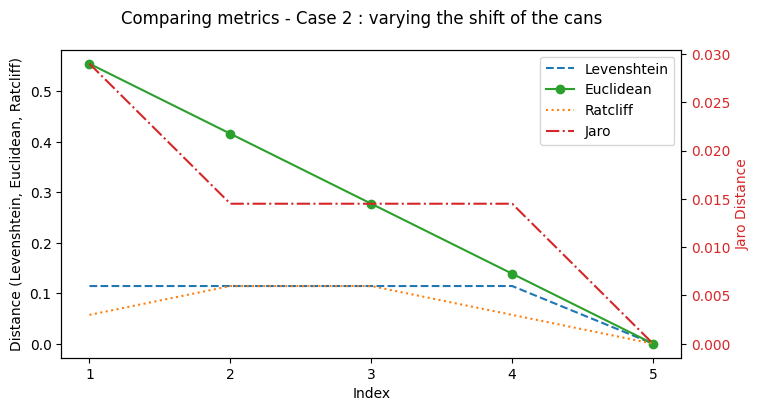

In [71]:
test_comparing_metrics_2(LIST_VECTORS_3, KEY_VECTOR_V)

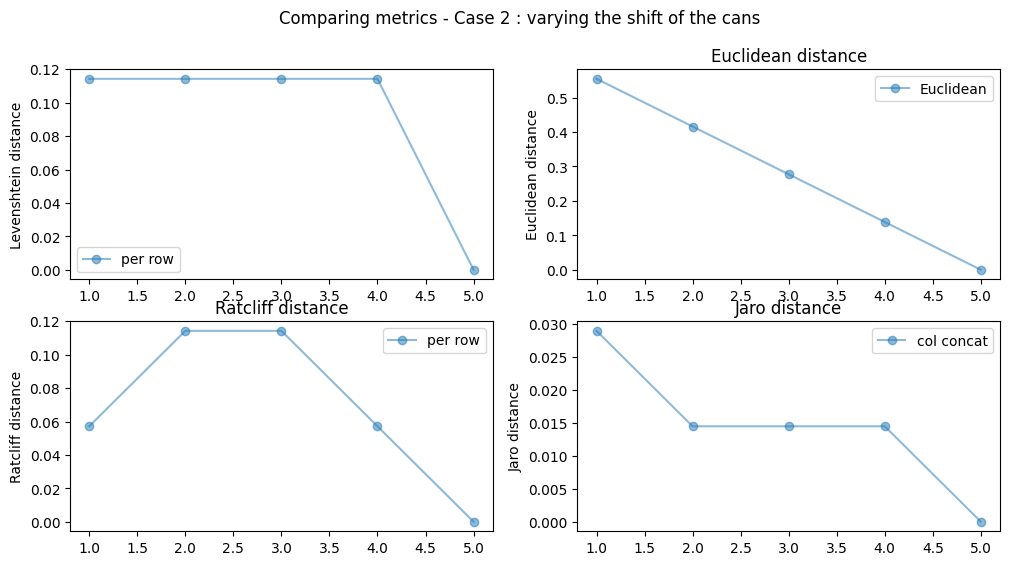

In [59]:
test_comparing_metrics_2_1(LIST_VECTORS_3, KEY_VECTOR_V, "Comparing metrics - Case 2 : varying the shift of the cans")

In [72]:
import scipy.stats as stats

# pearson correlation between Successive Euclidean Distance and Successive Code Space Distance
print(stats.pearsonr(df['delta_successive'], df['Submission_TreeDist_Successive']))

PearsonRResult(statistic=0.35174020098744624, pvalue=1.1323562136191044e-156)


In [73]:
import scipy.stats as stats

# pearson correlation between Successive Euclidean Distance and Successive Code Space Distance
df_l1 = df[df['activity'] == 1]
df_l2 = df[df['activity'] == 2]
df_l3 = df[df['activity'] == 3]

dfs = [df_l1, df_l2, df_l3]

for i, data in enumerate(dfs): 
    print(f"Activity {i+1}")
    print(stats.pearsonr(data['delta_successive'], data['Submission_TreeDist_Successive']))

Activity 1
PearsonRResult(statistic=0.47758573047115066, pvalue=7.224552713680844e-119)
Activity 2
PearsonRResult(statistic=0.47524276319187053, pvalue=1.119315458408969e-118)
Activity 3
PearsonRResult(statistic=0.5394558235967246, pvalue=2.181728658128001e-92)
